In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.pendulum import Pendulum

In [ ]:
pendulum = Pendulum()
pendulum.state = np.array([0, 1])
pendulum.get_phase_acceleration_vector()

TypeError: Pendulum.get_phase_acceleration_vector() missing 1 required positional argument: 'self'

: 

In [ ]:
ro = 1
bound = 2 * np.pi
rs = np.linspace(0, bound, np.ceil(bound * ro).astype(int))

points_ax = []
for r in rs:
    length = 2 * np.pi * r
    points_num = ro * length
    thetas = np.linspace(0, 2 * np.pi, np.ceil(points_num).astype(int)+1)
    for theta in thetas:
        point = r * np.array([np.cos(theta), np.sin(theta)])
        acceleration_vector = pendulum.get_phase_acceleration_vector(point)

        points_ax.append([point, acceleration_vector])


TypeError: Pendulum.get_phase_acceleration_vector() takes 1 positional argument but 2 were given

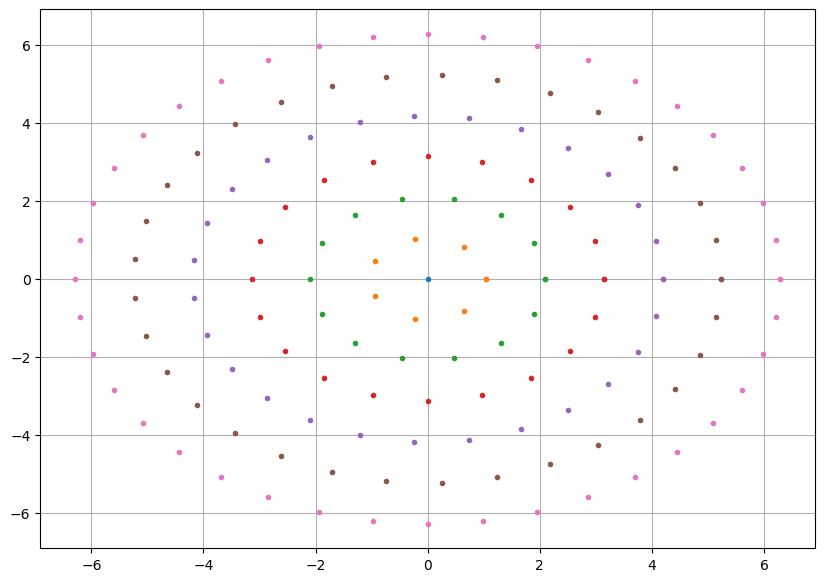

In [ ]:
plt.figure(figsize=(10, 7))

for circle in points:
    # print(circle)
    circle_ = np.array(circle)
    if len(circle_) > 0:
        plt.plot(circle_[:, 0], circle_[:, 1], '.')
plt.grid()


In [ ]:

from src.pendulum_jit import phase_acceleration_vector

def generate_colored_phase_field(length=1, damping=0.1, gravity=9.81, 
                               angle_range=(-np.pi, np.pi), 
                               velocity_range=(-5, 5), 
                               grid_size=20):
    """
    Генерирует стрелки одинакового размера, но разных цветов
    """
    
    # Создаем сетку точек
    angles = np.linspace(angle_range[0], angle_range[1], grid_size)
    velocities = np.linspace(velocity_range[0], velocity_range[1], grid_size)
    
    X, Y = np.meshgrid(angles, velocities)
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    magnitudes = np.zeros_like(X)
    
    # Вычисляем векторы и их величины
    for i in range(grid_size):
        for j in range(grid_size):
            state = np.array([X[i, j], Y[i, j]])
            phase_vector = phase_acceleration_vector(state, length, damping, gravity)
            U[i, j] = phase_vector[0]
            V[i, j] = phase_vector[1]
            magnitudes[i, j] = np.sqrt(phase_vector[0]**2 + phase_vector[1]**2)
    
    return X, Y, U, V, magnitudes

def plot_colored_phase_field(length=1, damping=0.1, gravity=9.81):
    """Строит фазовое поле с цветными стрелками одинакового размера"""
    
    # Генерируем данные
    X, Y, U, V, magnitudes = generate_colored_phase_field(length, damping, gravity)
    
    # Нормализуем векторы для одинакового размера стрелок
    U_norm = U / np.sqrt(U**2 + V**2)
    V_norm = V / np.sqrt(U**2 + V**2)
    
    # Создаем график
    plt.figure(figsize=(12, 8))
    
    # Рисуем стрелки одинакового размера, но разных цветов
    plt.quiver(X, Y, U_norm, V_norm, magnitudes, 
                cmap='cool', alpha=0.8, scale=50, width=0.003)
    
    # Добавляем цветовую шкалу
    cbar = plt.colorbar()
    cbar.set_label('Величина вектора', rotation=270, labelpad=20)
    
    # Настройки графика
    plt.xlabel('Угол (рад)')
    plt.ylabel('Угловая скорость (рад/с)')
    plt.title(f'Фазовое поле маятника (цвет = величина вектора)\nL={length}, Damping={damping}, g={gravity}')
    plt.grid(True, alpha=0.3)
    
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-5, 5)
    plt.show()

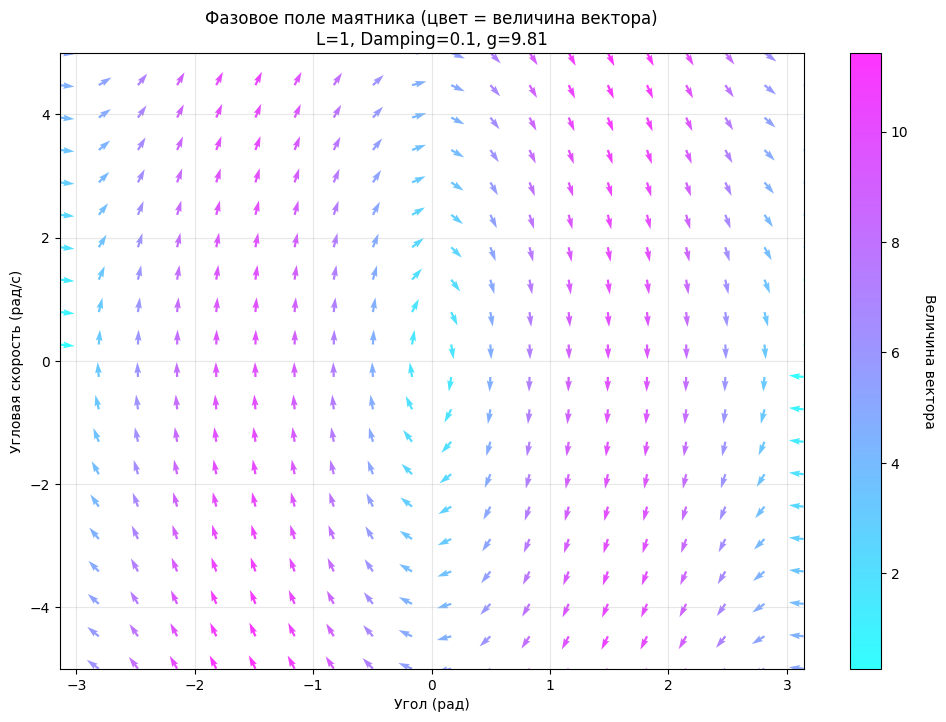

In [ ]:
plot_colored_phase_field()